## Bank Marketing Model
### Dataset Information

The data is related with direct marketing campaigns of a European banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. Information about a predictive model currently being used by the bank is also included. The dataset contains 41188 records with 20 inputs, ordered by date (from May 2008 to November 2010).

### Attribute Information
Input Variables:
1. age (numeric) 
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') 
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) 
4. education:(categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course',
   'university.degree','unknown') 
5. default: has credit in default? (categorical: 'no','yes','unknown') 
6. housing: has housing loan? (categorical: 'no','yes','unknown') 
7. loan: has personal loan? (categorical: 'no','yes','unknown') # related with the last contact of the current campaign 
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') 
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. 
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) 
14. previous: number of contacts performed before this campaign and for this client (numeric) 
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') # social and economic context attributes 
16. emp.var.rate: employment variation rate - quarterly indicator (numeric) 
17. cons.price.idx: consumer price index - monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate - daily indicator (numeric) 
20. nr.employed: number of employees - quarterly indicator (numeric)
21. ModelPerformance – Results from a current model used to predict whether a client will subscribe (‘yes’) to a term deposit (probability of subscribing to term deposit) 
Output Variable (desired target): 
22. y - has the client subscribed a term deposit? (binary: 'yes','no')



### Importing all required libraries

In [1]:
# Import all required libraries, include numpy, pandas, matplotlib, seaborn, and statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import sklearn

### Load data and Look at the first 10 rows of data

In [2]:
# Load data from current directory
bank_marketing=pd.read_csv('DSA Data Set.csv')
# Check the first 10 lines of the dataframe
bank_marketing.head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.957424,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.926402,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.956709,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.931072,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.941608,no


### Quickly check information about the dataset

In [3]:
# Quickly get information about the dataset, included data type of each column, number of non-null values for each column 
# mainly to see if any missing values in the dataset
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age                41188 non-null int64
job                41188 non-null object
marital            41188 non-null object
education          41188 non-null object
default            41188 non-null object
housing            41188 non-null object
loan               41188 non-null object
contact            41188 non-null object
month              41188 non-null object
day_of_week        41188 non-null object
duration           41188 non-null int64
campaign           41188 non-null int64
pdays              41188 non-null int64
previous           41188 non-null int64
poutcome           41188 non-null object
emp.var.rate       41188 non-null float64
cons.price.idx     41188 non-null float64
cons.conf.idx      41188 non-null float64
euribor3m          41188 non-null float64
nr.employed        41188 non-null float64
ModelPrediction    41188 non-null float64
y                  41188 non-

`Results:  No missing values for all columns.`


In [4]:
# Convert object data to categorical data
for col in ['job', 'marital', 'education', 'default','housing','loan','contact','month','day_of_week','poutcome']:
    bank_marketing[col] = bank_marketing[col].astype('category')
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age                41188 non-null int64
job                41188 non-null category
marital            41188 non-null category
education          41188 non-null category
default            41188 non-null category
housing            41188 non-null category
loan               41188 non-null category
contact            41188 non-null category
month              41188 non-null category
day_of_week        41188 non-null category
duration           41188 non-null int64
campaign           41188 non-null int64
pdays              41188 non-null int64
previous           41188 non-null int64
poutcome           41188 non-null category
emp.var.rate       41188 non-null float64
cons.price.idx     41188 non-null float64
cons.conf.idx      41188 non-null float64
euribor3m          41188 non-null float64
nr.employed        41188 non-null float64
ModelPrediction    41188 non-null float64
y        

### Quick Stat to check 

In [5]:
# Quick Stats for the data set, mainly to check outliers
bank_marketing.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


`Results:
 age: No obvious outliers, min=17, mean=40, max=98 (all reasonable age as bank customers) 
 duration: No obvious outliers, min=0, mean=258, max=4918(we will not include the column in building the model , but still interesting to see how does it correlate to the results since it will highly influence the results.)
 campaign: No obvious outliers, min=1, mean = 2, max= 56 (56 is a little big for number of contacts for a client, maybe this client is very important. 
 pdays: the 25,50,75 percentile and max are all 999 values is an indication that most of the values in this column is 999 which means most of the clients were not previously contacted. 
 previous: min, 25, 50, 75 percentile are all 0, this is an indication that majority of the values in this column is 0 which means most of the clients were not contacted before this campaign
 emp.var.rate: no obvious outliers. mean is closer to median 
 cons.price.idx: no obious outliers. mean is closer to median 
 cons.conf.idx: no obvious outliers mean is closer to median 
 euribor3m: no obvious outliers mean is closer to median 
 nr.employed: no obvious outliers mean is closer to median`

### Dealing with Missing Values and Duplicated Values

In [6]:
# Dealing with Missing Values, it looks like our dataset does not have any missing values. All columns have 41188 non-null rows

# Drop Duplicated rows
bank_marketing=bank_marketing.drop_duplicates()

# Check how many rows left after clean up the duplicated rows
print(bank_marketing.shape)

(41176, 22)


`Results: No missing values for all columns. There are few duplicated rows 41188-41176= 12`

# Exploratory Data Analysis

###  Numerical Data Analysis 

1.Age

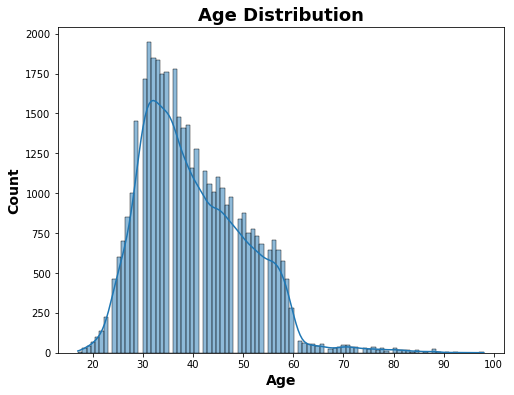

In [7]:
# age
fig=plt.figure(figsize=(8,6))
sns.histplot(data=bank_marketing, x="age", kde=True)
plt.title('Age Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.savefig('Age Distribution.png')
plt.show()

`Age: Right-skewed distribution with few values at large value end. Median(38) < Mean(40)`

2.Duration

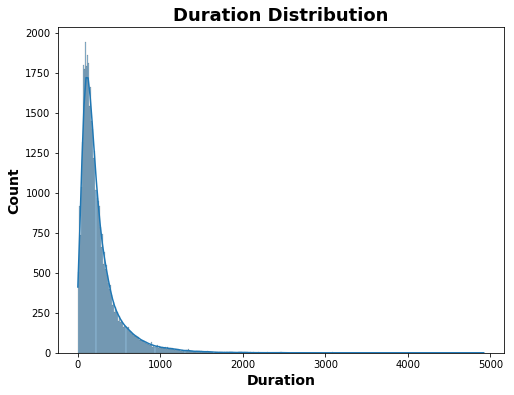

In [8]:
# duration
fig=plt.figure(figsize=(8,6))
sns.histplot(data=bank_marketing, x="duration", kde=True)
plt.title('Duration Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Duration', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.savefig('Duration Distribution.png')
plt.show()

` Duration: Right-skewed distribution with few values at larger end, Median(180) <<< Mean(258)`


3. Pair plot of several variables

<Figure size 576x432 with 0 Axes>

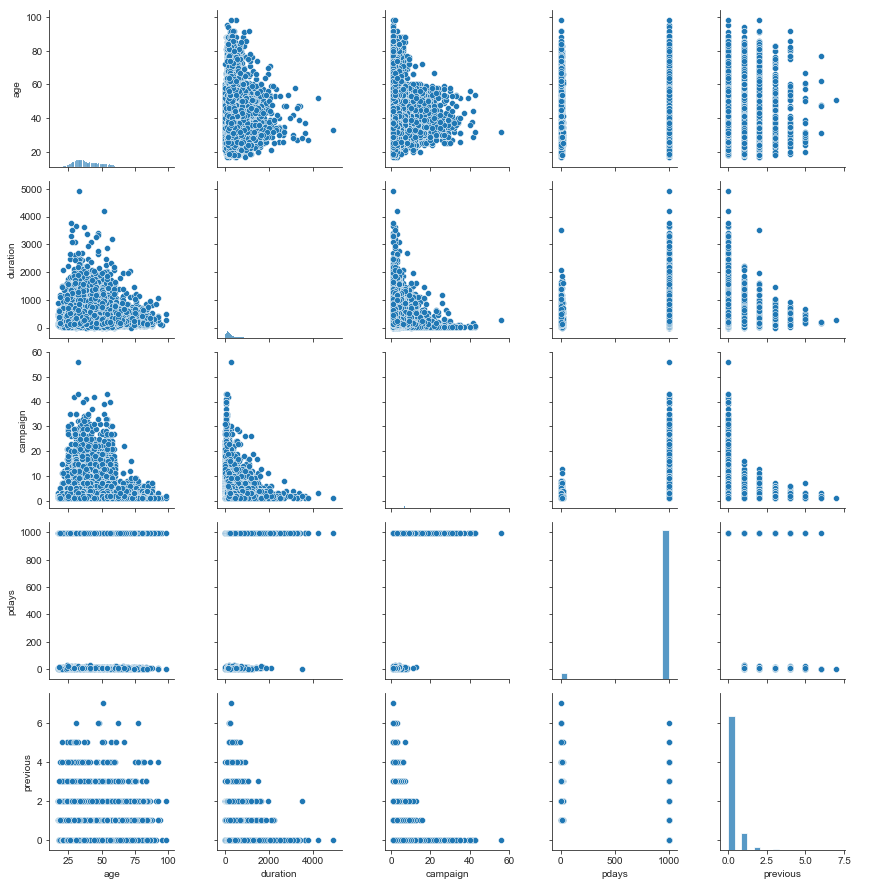

In [9]:
# Pair Plot of first five numerical variables 
fig=plt.figure(figsize=(8,6))
sns.set_style('ticks')
sns.pairplot(bank_marketing[['age', 'duration', 'campaign', 'pdays','previous']])
plt.savefig('Pair Plot of Selected Features 2.png')

<Figure size 576x432 with 0 Axes>

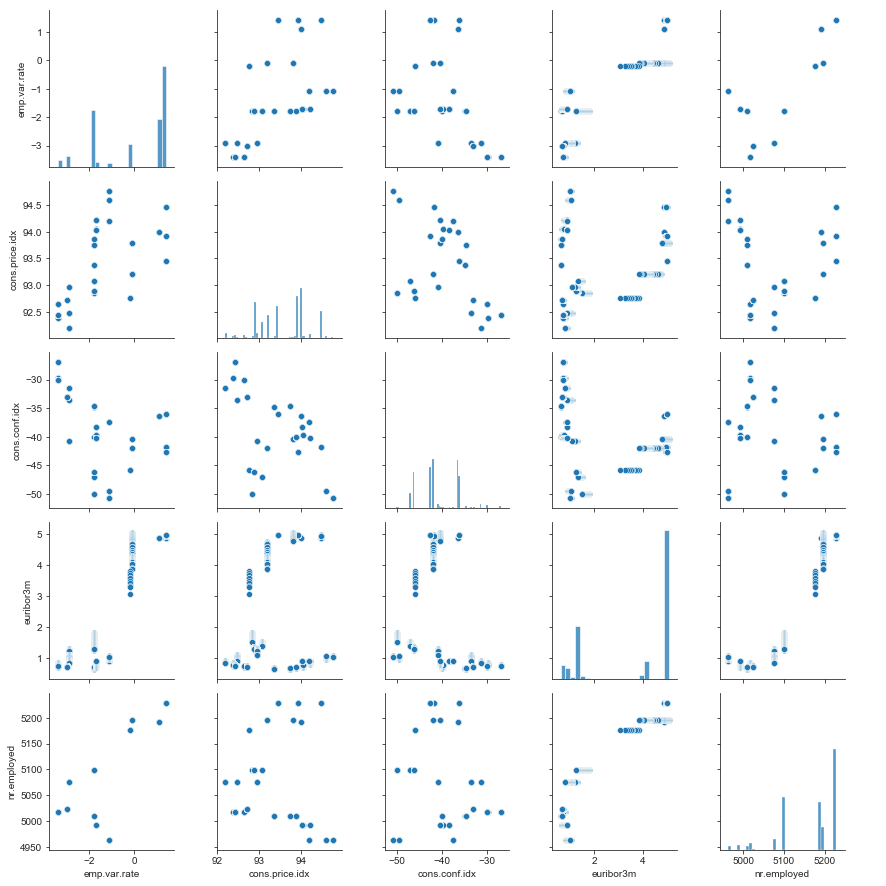

In [10]:
# Pair plot of last 5 numerical variables, 
fig=plt.figure(figsize=(8,6))
sns.set_style('ticks')
sns.pairplot(bank_marketing[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','nr.employed']])
plt.savefig('Pair Plot of Selected Features.png')

1. Age: From the scatter plot matrix, cannot find any obvious correlation between age and other variables. Although, the campaign number could be high for ages between 20-60, very low for ages >60. Probably the main target clients are young and middle aged persons One more observation: for all age groups, the euribor3m are either <2 or >4.
2. Campaign: From the scatter plot matrix, cannot find any obvious correlation between campaign and other variables. All all campaign number, the euribor3m shows a similr behavior as age: <2 or >4.
3. Emp.Var.Rate: There might be a positive correlation between emp.var.rate and nr.employed. 
4. Cons.price.idx: There might be a negative correlation between cons.price.idx and cons.conf.idx. And a potential positive correlation between cons.price.idx and emp.var.rate.
5. cons.conf.idx: No obvious correlation between cons.conf.idx and other variables except cons.price.idx.
6. euribor3m: There might be a positive correlation between euribor3m and nr.employed. Another possible positive correlation between euribor3 and emp.var.rate
7. nr.employed: A positive correlation between euribor3m and nr.employed, and a positive correlation between emp.var.rate and nr.employed. 
 

### Heatmap 

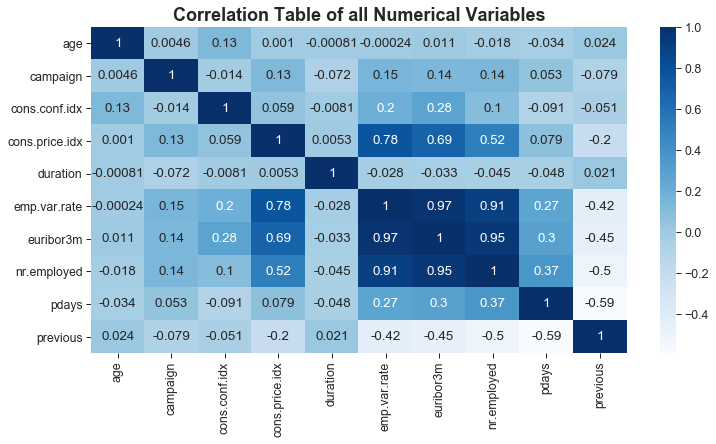

In [11]:
# Create Heatmap to show the correlation among the numerical variables
plt.figure(figsize=(12,6))
sns.set_context('paper', font_scale=1.4)

bank_marketing_mx =bank_marketing[bank_marketing.columns.difference(['ModelPrediction'])].corr()
sns.heatmap(bank_marketing_mx, annot=True, cmap='Blues')
plt.title('Correlation Table of all Numerical Variables', fontsize=18, fontweight='bold')
plt.savefig('Correlation Table of all Numerical Variables.png')
plt.show()

Highly Correlated Variables: Employment Variation Rate, Euribor 3 month rate, number of employees. Those three variables are all different types of measurement of employement status. In order to reduce the Multicollinearity problems in the model, suggested either use one out of those three variables(features) or use PCA to reduce the number of variables. For simplicity purpose, just from looking at the heatmap, both Employment Variation Rate and Euribor 3 month had the biggest correlation number among other variables. So just take out those two variables will reduce the possibility of Multicollinearity. 
 
 Medium Correlated Variables: consumer price index, pdays, previous. All of them are correlated to the three employment status features. If we are able to eliminate two of them, all the medium correlated variables should be kept in model building 
 
 Low Correlated Variables: The rest. Should be good enough to include in the model

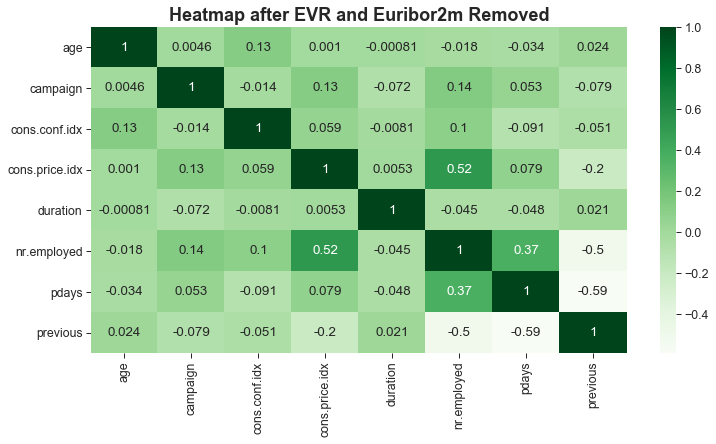

In [12]:
# Create Heatmap to check the correlation among numerical variables after employment variation rate 
# and euribor3m are removed
plt.figure(figsize=(12,6))
sns.set_context('paper', font_scale=1.4)

bank_marketing_mx =bank_marketing[bank_marketing.columns.difference(['ModelPrediction','emp.var.rate','euribor3m'])].corr()
sns.heatmap(bank_marketing_mx, annot=True, cmap='Greens')
plt.title('Heatmap after EVR and Euribor2m Removed', fontsize=18, fontweight='bold')
plt.savefig('Heatmap after EVR and Euribor2m Removed.png')
plt.show()

##  Categorical Variable Analysis


###  A. y(Outcome)
1. How many people actually subscribed a term deposit

In [13]:
# calculate percentage of the outcome
round(bank_marketing.y.value_counts(normalize=True),2)

no     0.89
yes    0.11
Name: y, dtype: float64

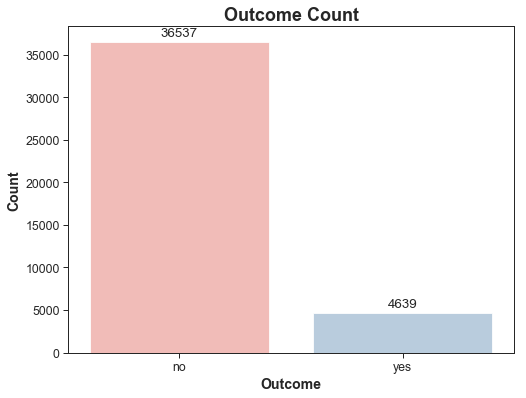

In [14]:
# To see the actual results of the campaign graphically
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
splot=sns.countplot(x='y', data = bank_marketing, palette="Pastel1")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                 textcoords = 'offset points')
                   
plt.title('Outcome Count', fontsize=18, fontweight='bold')
plt.xlabel('Outcome', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.show()

`From the plot, it seems that majority of the participant did not subscribed to a term deposit`

2. How does Age related to the results

In [15]:
# Create age groups
bank_marketing["agegrp1"] = pd.cut(bank_marketing.age, [17, 30, 40, 50, 60, 70, 80, 90, 100])


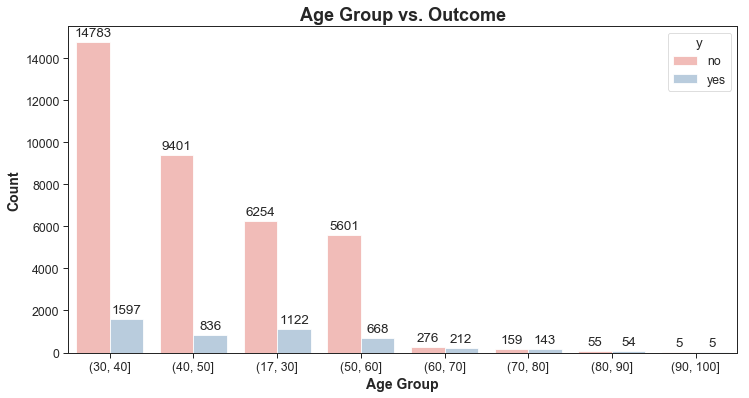

In [16]:
# Ploting age against outcome 
plt.figure(figsize=(12,6))
sns.set_context('paper', font_scale=1.4)
splot=sns.countplot(x='agegrp1', hue='y', data = bank_marketing, palette="Pastel1",
                   order=bank_marketing['agegrp1'].value_counts().index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                 textcoords = 'offset points')
                   
plt.title('Age Group vs. Outcome', fontsize=18, fontweight='bold')
plt.xlabel('Age Group', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.savefig('Age Group vs.Outcome.png')
plt.show()

3. How duration related to results(we know duration will definitely influence the results. Just to see how much)

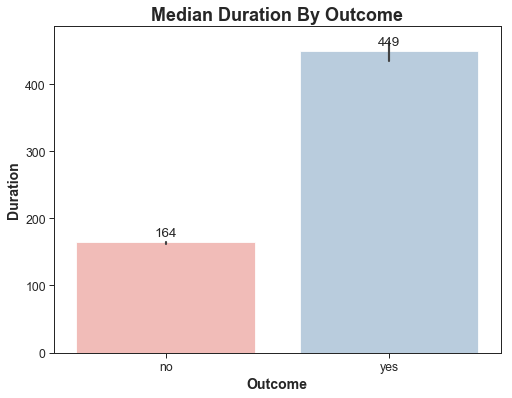

In [17]:
# Barplot of duration by outcome
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
splot=sns.barplot(x='y',y='duration', data = bank_marketing, estimator=np.median, palette="Pastel1")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Median Duration By Outcome', fontsize=18, fontweight='bold')
plt.xlabel('Outcome', fontsize=14,fontweight='bold')
plt.ylabel('Duration', fontsize=14,fontweight='bold')
plt.savefig('Median Duration By Outcome.png')
plt.show()

`The median call duration for clients who said yes is much higher than those who said no. More than 2X. This should not be a surprise as if clients are interested, they probably will spend more time in the conversation to know more information about the product or service. We will not include this variable in our model as it has very high influence on the results.`




### B. Job Type

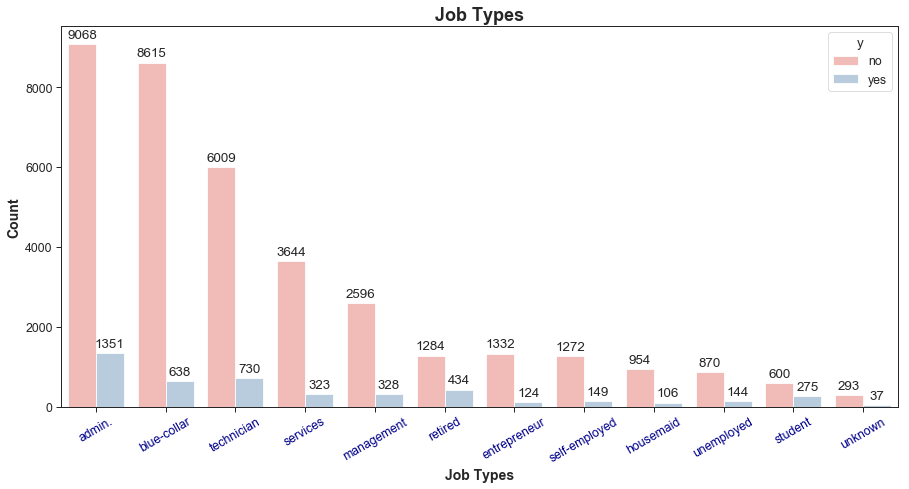

In [18]:
# Count of Job Type
plt.figure(figsize=(15,7))
sns.set_context('paper', font_scale=1.4)
splot=sns.countplot(x='job', data = bank_marketing, hue='y', palette="Pastel1",
              order=bank_marketing['job'].value_counts().index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                 textcoords = 'offset points')
plt.title('Job Types', fontsize=18, fontweight='bold')
plt.xlabel('Job Types', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.xticks(rotation=30,color='darkblue')
plt.savefig('Job Types.png')
plt.show()

### C. Marital Status

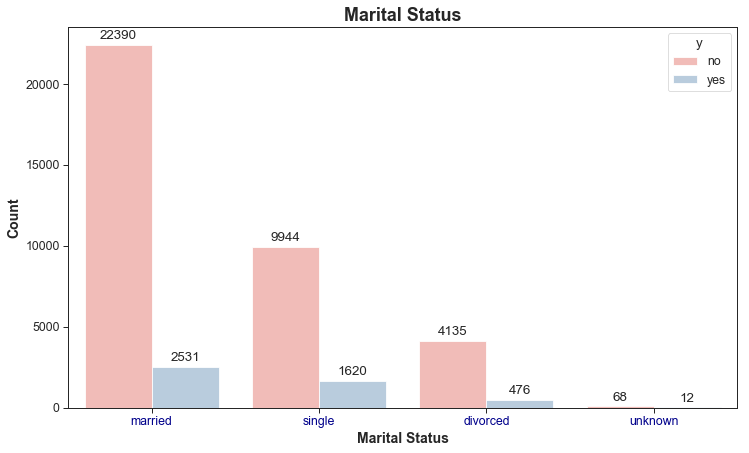

In [19]:
# Count of Marital Status 
plt.figure(figsize=(12,7))
sns.set_context('paper', font_scale=1.4)
splot=sns.countplot(x='marital', data = bank_marketing, hue='y', palette="Pastel1", 
                    order=bank_marketing['marital'].value_counts().index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                 textcoords = 'offset points')
plt.title('Marital Status', fontsize=18, fontweight='bold')
plt.xlabel('Marital Status', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.xticks(color='darkblue')
plt.savefig('Marital Status.png')
plt.show()

### D. Educational Level

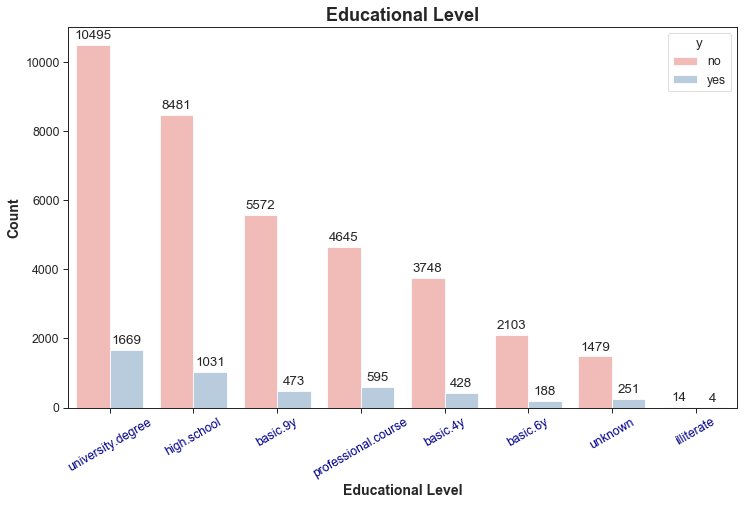

In [20]:
# Countplot of Educational Level
plt.figure(figsize=(12,7))
sns.set_context('paper', font_scale=1.4)
splot=sns.countplot(x='education', data = bank_marketing, hue='y', palette="Pastel1", 
                    order=bank_marketing['education'].value_counts().index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                 textcoords = 'offset points')
plt.title('Educational Level', fontsize=18, fontweight='bold')
plt.xlabel('Educational Level', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.xticks(rotation=30,color='darkblue')
plt.savefig('Educational Level.png')
plt.show()

### E. Credit Default Status

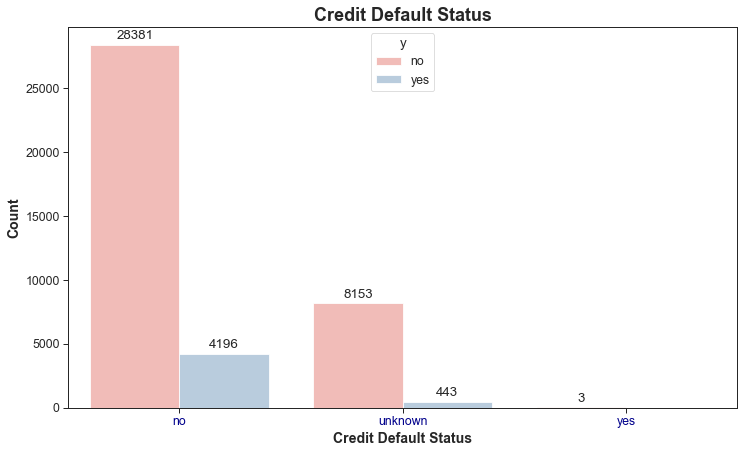

In [21]:
# Credit Default Status
plt.figure(figsize=(12,7))
sns.set_context('paper', font_scale=1.4)
splot=sns.countplot(x='default', data = bank_marketing, hue='y', palette="Pastel1", 
                    order=bank_marketing['default'].value_counts().index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                 textcoords = 'offset points')
plt.title('Credit Default Status', fontsize=18, fontweight='bold')
plt.xlabel('Credit Default Status', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.xticks(color='darkblue')
plt.savefig('Credit Default Status.png')
plt.show()

### F.  House Ownership 

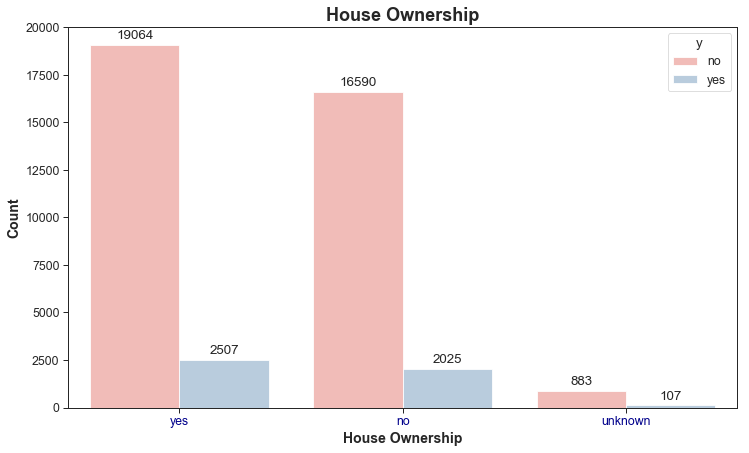

In [22]:
# Credit House Ownership
plt.figure(figsize=(12,7))
sns.set_context('paper', font_scale=1.4)
splot=sns.countplot(x='housing', data = bank_marketing, hue='y', palette="Pastel1", 
                    order=bank_marketing['housing'].value_counts().index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                 textcoords = 'offset points')
plt.title('House Ownership', fontsize=18, fontweight='bold')
plt.xlabel('House Ownership', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.xticks(color='darkblue')
plt.savefig('House Ownership.png')
plt.show()

### G. Personal Loan Status

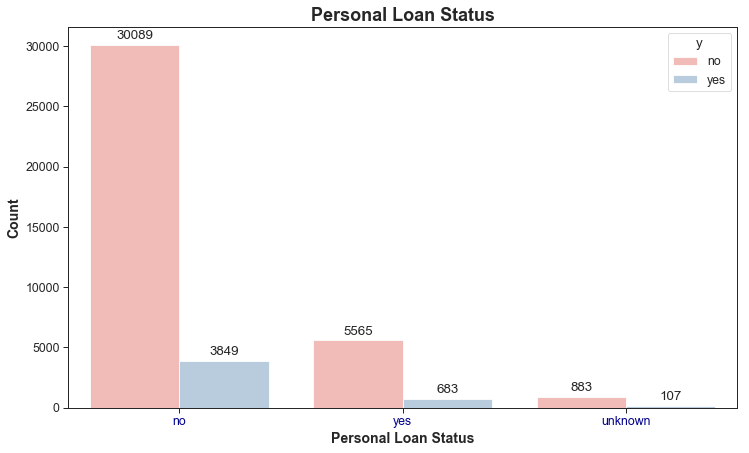

In [23]:
# Personal Loan Status
plt.figure(figsize=(12,7))
sns.set_context('paper', font_scale=1.4)
splot=sns.countplot(x='loan', data = bank_marketing, hue='y', palette="Pastel1", 
                    order=bank_marketing['loan'].value_counts().index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                 textcoords = 'offset points')
plt.title('Personal Loan Status', fontsize=18, fontweight='bold')
plt.xlabel('Personal Loan Status', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.xticks(color='darkblue')
plt.savefig('Personal Loan Status.png')
plt.show()

### I. Time Variables

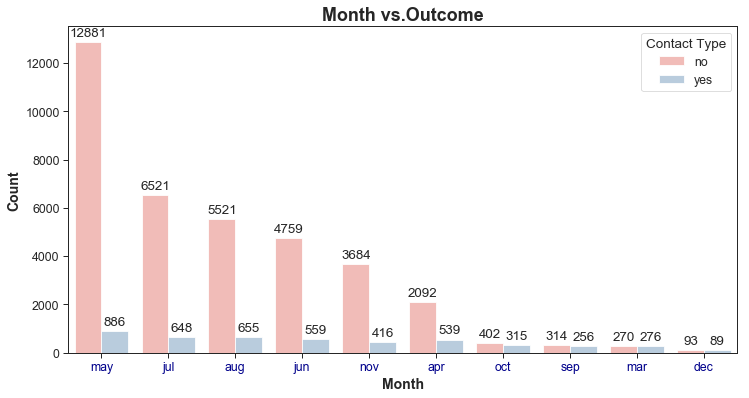

In [24]:
# Month verse Outcome
plt.figure(figsize=(12,6))
sns.set_context('paper', font_scale=1.4)
splot=sns.countplot(x='month', data = bank_marketing, hue='y', palette="Pastel1", 
                    order=bank_marketing['month'].value_counts().index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                 textcoords = 'offset points')

plt.title('Month vs.Outcome', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.xticks(color='darkblue')
plt.legend(title='Contact Type')
plt.savefig('Month vs.Outcome.png') 
plt.show()

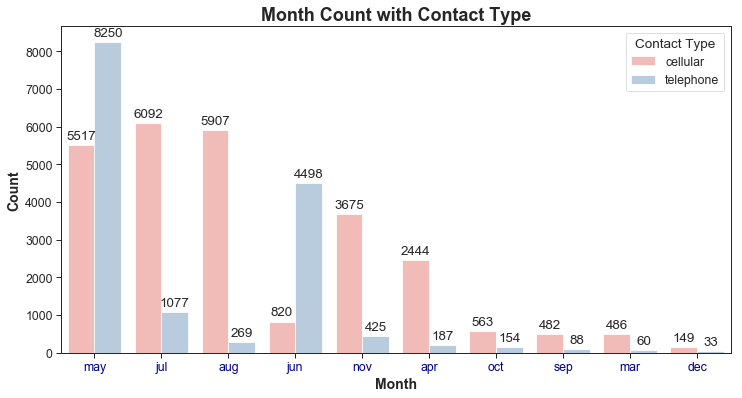

In [25]:
# Month Count with Contact Type
plt.figure(figsize=(12,6))
sns.set_context('paper', font_scale=1.4)
splot=sns.countplot(x='month', data = bank_marketing, hue='contact', palette="Pastel1", 
                    order=bank_marketing['month'].value_counts().index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                 textcoords = 'offset points')

plt.title('Month Count with Contact Type', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.xticks(color='darkblue')
plt.legend(title='Contact Type')
plt.savefig('Month Count With Contact Type.png') 
plt.show()

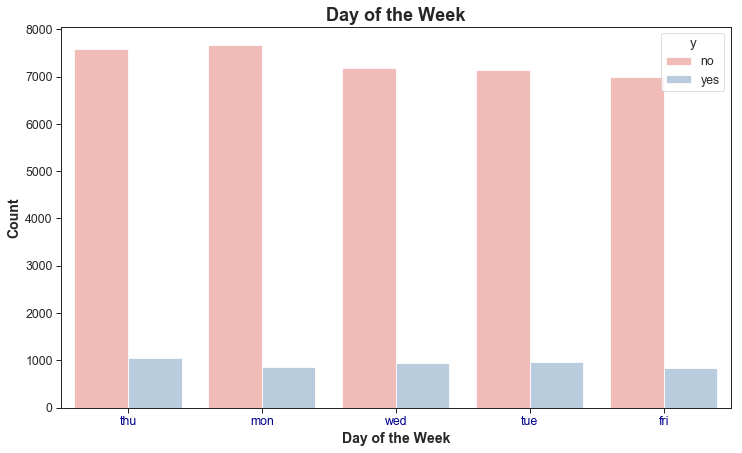

In [26]:
# Plot of Day of the week verse Outcome
plt.figure(figsize=(12,7))
sns.set_context('paper', font_scale=1.4)
sns.countplot(x='day_of_week', data = bank_marketing, hue='y', palette="Pastel1", 
                    order=bank_marketing['day_of_week'].value_counts().index)


plt.title('Day of the Week', fontsize=18, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.xticks(color='darkblue')
plt.show()

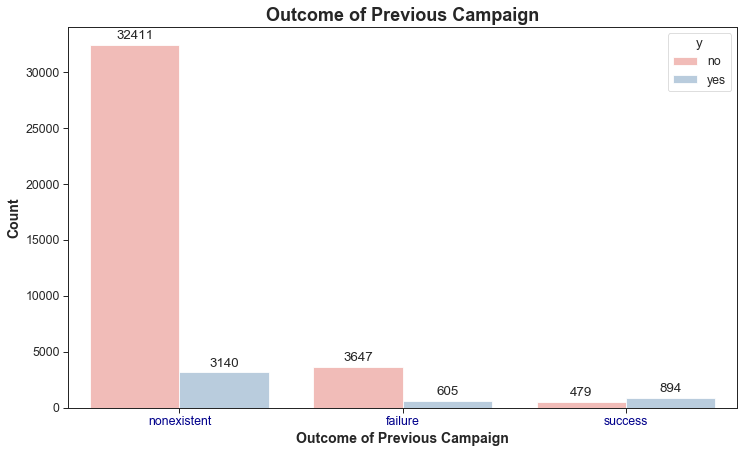

In [27]:
#Poutcome
plt.figure(figsize=(12,7))
sns.set_context('paper', font_scale=1.4)
splot=sns.countplot(x='poutcome', data = bank_marketing, hue='y', palette="Pastel1", 
                    order=bank_marketing['poutcome'].value_counts().index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                 textcoords = 'offset points')


plt.title('Outcome of Previous Campaign', fontsize=18, fontweight='bold')
plt.xlabel('Outcome of Previous Campaign', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.xticks(color='darkblue')
plt.savefig('Previous Campaign Outcome.png') 
plt.show()

## Current Model Performance

In [28]:
# Take out only Preduction and y
model_performance=bank_marketing[['ModelPrediction','y']]
model_performance.head(10)

,ModelPrediction,y
0,0.932750,no
1,0.953579,no
2,0.945724,no
3,0.933875,no
4,0.940996,no
5,0.957424,no
6,0.926402,no
7,0.956709,no
8,0.931072,no
9,0.941608,no


In [29]:
# Convert the Preduction to Binary
model_performance['Binary']= [int(i > .5) for i in model_performance['ModelPrediction']]
model_performance['Binary_str'] = model_performance['Binary'].map({1: 'yes', 0: 'no'})
model_performance.head(10)

C:\Users\yunin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\yunin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ModelPrediction,y,Binary,Binary_str
0,0.932750,no,1,yes
1,0.953579,no,1,yes
2,0.945724,no,1,yes
3,0.933875,no,1,yes
4,0.940996,no,1,yes
5,0.957424,no,1,yes
6,0.926402,no,1,yes
7,0.956709,no,1,yes
8,0.931072,no,1,yes
9,0.941608,no,1,yes


In [30]:
# Accuracy Score
from sklearn.metrics import accuracy_score
print('Model Accuracy:', accuracy_score(model_performance['y'], model_performance['Binary_str']))
# ROC AUC Score
from sklearn.metrics import roc_auc_score
print('ROC_AUC Score:', roc_auc_score(model_performance['y'], model_performance['ModelPrediction']))

Model Accuracy: 0.10236545560520692
ROC_AUC Score: 0.23534601519525544


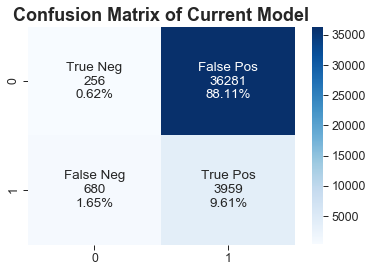

In [31]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(model_performance['y'], model_performance['Binary_str'])
                                               
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix of Current Model', fontsize=18, fontweight='bold')
plt.savefig('Confusion Matrix of Current Model.png') 

# Modeling 

## Pre-modeling Data Processing

As discussed earlier, for simplicity purpose, just from looking at the heatmap, both Employment Variation Rate and Euribor 3 month had the biggest correlation number among other variables. So just take out those two variables will reduce the possibility of Multicollinearity issue. Also since duration is not known before the call and will highly influence the output, we will not include this variable in the model. Also, for pdays, since most of the value is 999, I will actually make it a binary column where if value = 999, then it will be 1, then rest of them will be 0. 

In [32]:
# Exclude emp.var.rate and euribor3m from the dataset
clean_bank=bank_marketing[bank_marketing.columns.difference(['ModelPrediction','emp.var.rate','euribor3m','duration','agegrp1'])]

# Replace 999 with 1, the rest with 0
clean_bank['pdays']= [int(i>0) for i in clean_bank['pdays']]

# For contact type, replace telephone with 0 and cellular = 1
clean_bank['contact'] = clean_bank['contact'].map({'telephone': 0, 'cellular': 1})

# Separate out the input and output variables
clean_input=clean_bank[clean_bank.columns.difference(['y'])]
clean_output=clean_bank['y']

# One-hot encoding to convert categorical variables to numerical 
clean_encode=pd.get_dummies(clean_input)

C:\Users\yunin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\yunin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Model

### Logistic Regression

In [33]:
# Split Input Dataset into Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_encode, clean_output, test_size=0.3, random_state=21)

In [34]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,  y_train)
Y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)

In [35]:
# Accuracy Score
print('Accuracy Score On Test:', accuracy_score(y_test, Y_pred))

Y_pred_train = logreg.predict(X_train)
print('Accuary Score on Train:', accuracy_score(y_train, Y_pred_train))

Y_pred_all = logreg.predict(clean_encode)
print('Accuary Score on all:', accuracy_score(clean_output, Y_pred_all))

Accuracy Score On Test: 0.8952481178661054
Accuary Score on Train: 0.8996981577212643
Accuary Score on all: 0.8983631241499903


In [36]:
# ROC AUC Score
print('ROC_AUC Score:', roc_auc_score(y_test, y_pred_prob[:,1]))

ROC_AUC Score: 0.7716648910623343


In [37]:
# Classification Report
from sklearn.metrics import classification_report # evaluation metric
print( classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94     10930
         yes       0.64      0.20      0.31      1423

    accuracy                           0.90     12353
   macro avg       0.77      0.59      0.63     12353
weighted avg       0.87      0.90      0.87     12353



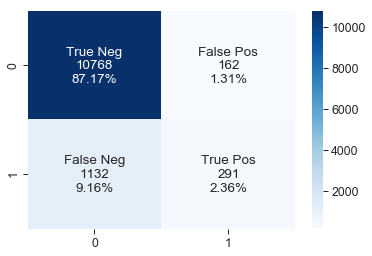

In [40]:
# Confusion matrix for test data
cf_matrix = confusion_matrix(y_test,Y_pred)
                                               
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

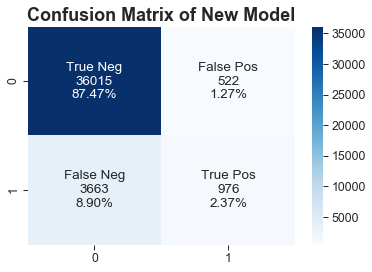

In [41]:
# Confusion Matrix for All data using new model
cf_matrix = confusion_matrix(clean_output, Y_pred_all)
                                               
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix of New Model', fontsize=18, fontweight='bold')
plt.savefig('Confusion Matrix of New Model.png') 
plt.show()